In [1]:
from emnist import extract_training_samples, extract_test_samples
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [5]:
images, labels = extract_training_samples("balanced");

In [6]:
test_X, test_y = extract_training_samples("balanced");

In [9]:
# Normalise
images = images.astype('float32')
images /= 255
test_X = test_X.astype('float32')
test_X /= 255

In [10]:
train_X, val_X, train_y, val_y = train_test_split(images, labels, test_size= 0.10, random_state=42)

In [11]:
images.shape

(112800, 28, 28)

In [12]:
train_X.shape

(101520, 28, 28)

In [13]:
num_classes = len(np.unique(train_y))

In [14]:
num_classes

47

In [ ]:
## Build a simple NN using keras 

In [42]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(256,activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 47)                12079     
Total params: 145,583
Trainable params: 145,583
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(train_X, train_y, epochs=100,verbose=0,validation_data=(val_X, val_y))

In [40]:
# evaluate the model
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.958, Test: 0.945


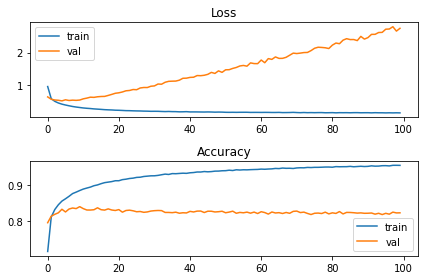

In [41]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['sparse_categorical_accuracy'], label='train')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# plot accuracy and loss
def plot_performance(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='uper left')
    plt.show()

In [29]:
#%%
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)



KeyError: 'acc'

In [47]:
train_y[:10]

array([33, 45,  5, 33, 43, 32,  6,  6,  7, 40], dtype=uint8)